In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [7]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:50<00:00, 23.9MB/s]
100% 1.06G/1.06G [00:50<00:00, 22.7MB/s]


In [8]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [9]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [10]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [11]:
# Normalize
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [20]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))



In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [14]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 71s 89ms/step - loss: 0.6130 - accuracy: 0.6571 - val_loss: 0.5625 - val_accuracy: 0.7064
Epoch 2/10
625/625 [==============================] - 57s 91ms/step - loss: 0.4928 - accuracy: 0.7588 - val_loss: 0.4936 - val_accuracy: 0.7770
Epoch 3/10
625/625 [==============================] - 55s 87ms/step - loss: 0.4013 - accuracy: 0.8185 - val_loss: 0.4750 - val_accuracy: 0.7794
Epoch 4/10
625/625 [==============================] - 57s 91ms/step - loss: 0.2739 - accuracy: 0.8828 - val_loss: 0.5493 - val_accuracy: 0.7840
Epoch 5/10
625/625 [==============================] - 58s 92ms/step - loss: 0.1622 - accuracy: 0.9368 - val_loss: 0.7317 - val_accuracy: 0.7788
Epoch 6/10
625/625 [==============================] - 56s 90ms/step - loss: 0.0982 - accuracy: 0.9653 - val_loss: 0.9154 - val_accuracy: 0.7810
Epoch 7/10
625/625 [==============================] - 55s 88ms/step - loss: 0.0706 - accuracy: 0.9768 - val_loss: 0.8260 - val_accuracy:

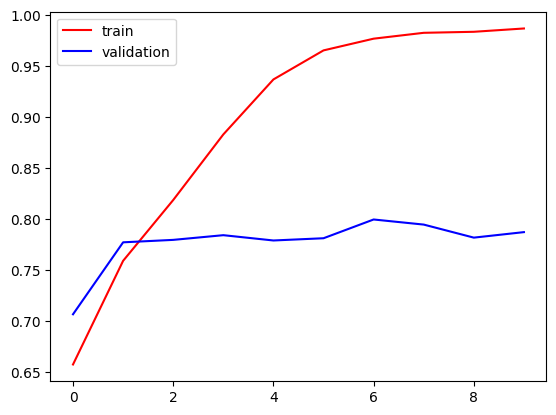

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

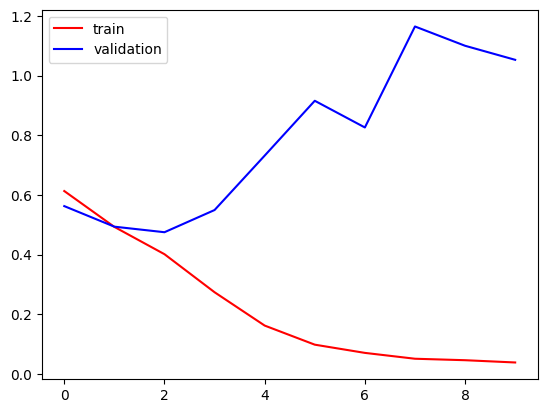

In [21]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [22]:
import cv2

In [23]:
test_img = cv2.imread('/content/dog.jpeg')

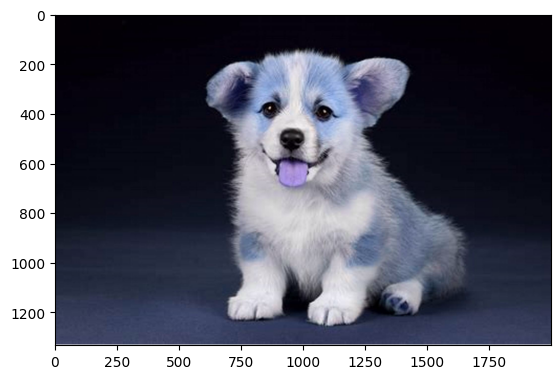

In [24]:
plt.imshow(test_img)

In [25]:
test_img.shape

(1333, 2000, 3)

In [26]:
test_img = cv2.resize(test_img,(256,256))

In [27]:
test_input = test_img.reshape((1,256,256,3))

In [28]:
model.predict(test_input)

1/1 [==============================] - 0s 277ms/step


array([[3.2571927e-06]], dtype=float32)

In [31]:
test_img = cv2.imread('/content/meow.jpeg')

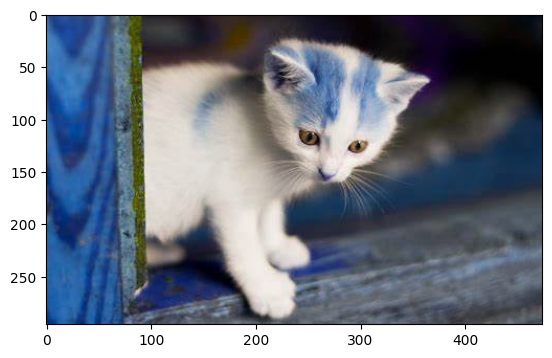

In [32]:
plt.imshow(test_img)

In [33]:
test_img.shape

(296, 474, 3)

In [34]:
test_img = cv2.resize(test_img,(256,256))

In [35]:
test_input = test_img.reshape((1,256,256,3))

In [36]:
model.predict(test_input)

1/1 [==============================] - 0s 21ms/step


array([[1.6698225e-06]], dtype=float32)